In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def CVaR(returns, alpha):
    var = np.sort(returns[:])[int(len(returns[:]) * alpha)]
    idx = np.where(returns[:] <= var)
    CVaR = np.mean(returns[idx])
    return CVaR

def read(name, rang, alpha=0.25, reshape=1):
    file = np.load(name%(0))
    
    cvar = np.zeros(file.shape[0])
    for i in range(file.shape[0]):
        var = np.sort(file[i, :])[int(len(file[i, :]) * alpha)]
        idx = np.where(file[i, :] <= var)
        cvar[i] = np.mean(file[i, idx])
    cvar = np.expand_dims(cvar, axis = 0)
    
    for i in range(1, rang):
        file = np.load(name%(i))
        #file = file.reshape((-1, file.shape[1]*reshape))
        temp = np.zeros(file.shape[0])
        for i in range(file.shape[0]):
            var = np.sort(file[i, :])[int(len(file[i, :]) * alpha)]
            idx = np.where(file[i, :] <= var)
            temp[i] = np.mean(file[i, idx])
        temp = np.expand_dims(temp, axis = 0)
        cvar = np.concatenate([cvar, temp], axis = 0)
    return cvar
def CVaRplot(ax, ret, label, n =20):
    mean = mv(np.mean(ret, axis=0), n)
    std = mv(np.std(ret, axis=0), n)
    plt.plot(mean, label=label, linewidth=2)
    plt.fill_between(np.arange(mean.shape[0]), mean-0.5*std, mean+0.5*std, alpha=0.4)

def mv(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [2]:
from mrp import machine_repair

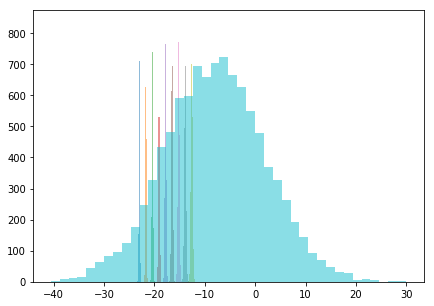

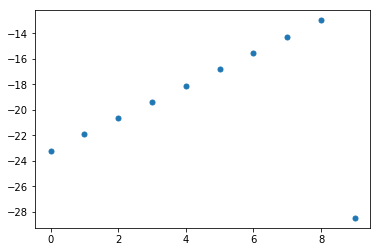

In [258]:
CVaRs = np.zeros(10)
plt.figure(figsize=(7, 5))
trial = 10000
for i in range(10):
    policy = np.zeros(10) + 1
    policy[i] = 0
    env = machine_repair()
    returns = np.zeros(trial)
    for n in range(trial):
        o = env.reset()
        terminal = False
        ret = 0
        while not terminal:
            a = policy[o]
            no, r, terminal = env.step(a)
            ret += r
            o = no
        returns[n] = ret
    plt.hist(returns, bins=40, alpha=0.5, label='Repair at %d'%(i))
    CVaRs[i] = CVaR(returns, 0.05)
plt.figure()
plt.plot(CVaRs, '.', markersize=10)

Cliff: -7.475934418676837 CVaR: -14.17117410021858
Cliff: -8.680775650493889 CVaR: -12.043929038048688
Cliff: -10.36997443885087 CVaR: -13.096511048318023
Cliff: -34.18594199920578 CVaR: -74.0482302266665


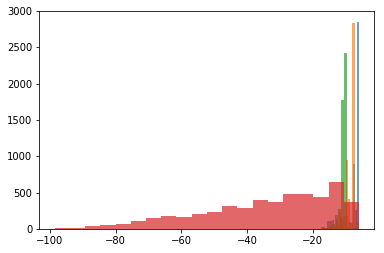

In [3]:
from cliff import Cliff
env = Cliff(delta=0.1, M=10)

for i in range(4):
    policy = np.zeros((env.maxX, env.maxY)) + 1
    policy[0, 0] = 0
    if i>= 1:
        policy[0, 1] = 0
    if i>= 2:
        policy[0, 2] = 0
    if i>= 3:
        policy[0, 3] = 0
    policy[env.maxX-1, :] = 2

    trial = 5000
    total = np.zeros(trial)
    for i in range(trial):
        o = env.reset()
        terminal = False
        ret = []
        while not terminal:
            a = int(policy[env.current_state])
            no, r, terminal = env.step(a)
            ret.append(r)
        dret = 0
        for r in reversed(ret):
            dret = r + 0.99*dret
        total[i] = dret
    print('Cliff:', np.mean(total), 'CVaR:', CVaR(total, 0.1))
    plt.hist(total, alpha=0.7, bins=20)


In [8]:
print(res)
print(res1)

[(-64.02358962982366, -22.64526254897419), (-64.18863564938927, -22.467490007929804), (-64.07561083388187, -22.60883111376156), (-64.58633411409107, -22.902585530797158), (-63.86690986380867, -22.68659028278436)]
[(-63.936808830080466, -21.983158923275035), (-64.68823222424442, -21.89480863980812), (-63.66415532775954, -21.789228588138016), (-64.1796599523586, -21.943764759677542), (-63.899096633895994, -21.911525232427735)]


Machine Repair, nS = 10, 3 Different Policies: 

1. p1: not repair
2. p2: repair at [-1]
3. p3: repair at [-2]
4. p4: reapir at [-3]

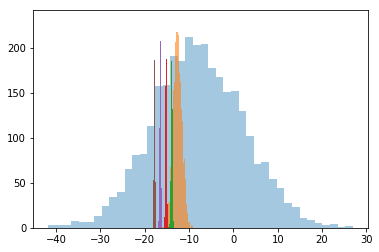

In [235]:
plt.hist(p2, bins=40, alpha=0.4, label='all not repair - 1');
plt.hist(p3, bins=40, alpha=0.6, label='all not repair - 2');
plt.hist(p4, bins=40, alpha=1, label='all not repair - 3');
plt.hist(p5, bins=40, alpha=1, label='all not repair - 4');
plt.hist(p6, bins=40, alpha=1, label='all not repair - 5');
plt.hist(p7, bins=40, alpha=1, label='all not repair - 6');

In [239]:
CVaR(returns, 0.25)

-14.09613165102302

In [206]:
print(CVaR(p2, 0.25), CVaR(p3,0.25), CVaR(p4,0.25), CVaR(p5, 0.25), CVaR(p6, 0.25),\
      CVaR(p7, 0.25), CVaR(p8, 0.25),CVaR(p9, 0.25), CVaR(returns, 0.25))

NameError: name 'p2' is not defined

In [59]:
alpha = 0.01
CVaRalpha = np.array([CVaR(p2, alpha), CVaR(p3,alpha), CVaR(p4,alpha), CVaR(p5, alpha), CVaR(p6, alpha),\
      CVaR(p7, alpha), CVaR(p8, alpha),CVaR(p9, alpha)])

Text(0,0.5,'CVaR 0.25')

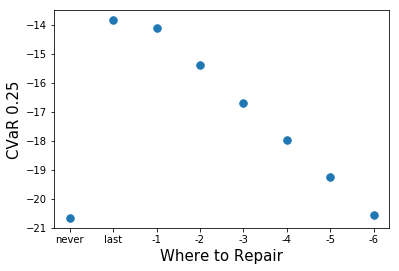

In [55]:
plt.plot([-20.66888775365751,-13.84705959272545,-14.128583926728682,\
          -15.406251169207456,-16.69258923741405, -17.98446898597323,\
         -19.259120801524134, -20.55660313202146], '.', markersize=15)
plt.xticks(np.arange(8), ['never', 'last', '-1', '-2', '-3', '-4', '-5', '-6'])
plt.xlabel('Where to Repair', fontsize=15)
plt.ylabel('CVaR 0.25', fontsize=15)

Text(0,0.5,'CVaR 0.01')

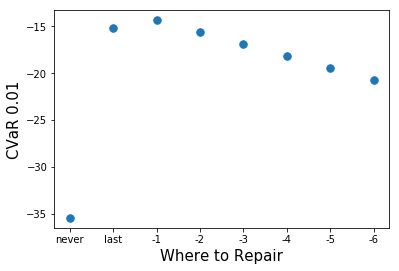

In [60]:
plt.plot(CVaRalpha, '.', markersize=15)
plt.xticks(np.arange(8), ['never', 'last', '-1', '-2', '-3', '-4', '-5', '-6'])
plt.xlabel('Where to Repair', fontsize=15)
plt.ylabel('CVaR 0.01', fontsize=15)

In [297]:
C2_Opt40_eval = read('results/cdf_2_40_cdf_eval_%d.npy', 10, alpha=0.25)
C2_Opt40_online = read('results/cdf_2_40_cdf_online_%d.npy', 10, alpha=0.25)

C2_Opt20_eval = read('results/cdf_2_20_cdf_eval_%d.npy', 10, alpha=0.25)
C2_Opt20_online = read('results/cdf_2_20_cdf_online_%d.npy', 10, alpha=0.25)

C1_Opt40_eval = read('results/cdf_1_40_cdf_eval_%d.npy', 10, alpha=0.25)
C1_Opt40_online = read('results/cdf_1_40_cdf_online_%d.npy', 10, alpha=0.25)

C1_Opt20_eval = read('results/cdf_1_20_cdf_eval_%d.npy', 10, alpha=0.25)
C1_Opt20_online = read('results/cdf_1_20_cdf_online_%d.npy', 10, alpha=0.25)

C1_Opt10_eval = read('results/cdf_1_10_cdf_eval_%d.npy', 10, alpha=0.25)
C1_Opt10_online = read('results/cdf_1_10_cdf_online_%d.npy', 10, alpha=0.25)

C10_Opt40_eval = read('results/cdf_10_40_cdf_eval_%d.npy', 10, alpha=0.25)
C10_Opt40_online = read('results/cdf_10_40_cdf_online_%d.npy', 10, alpha=0.25)

Text(0,0.5,'CVaR')

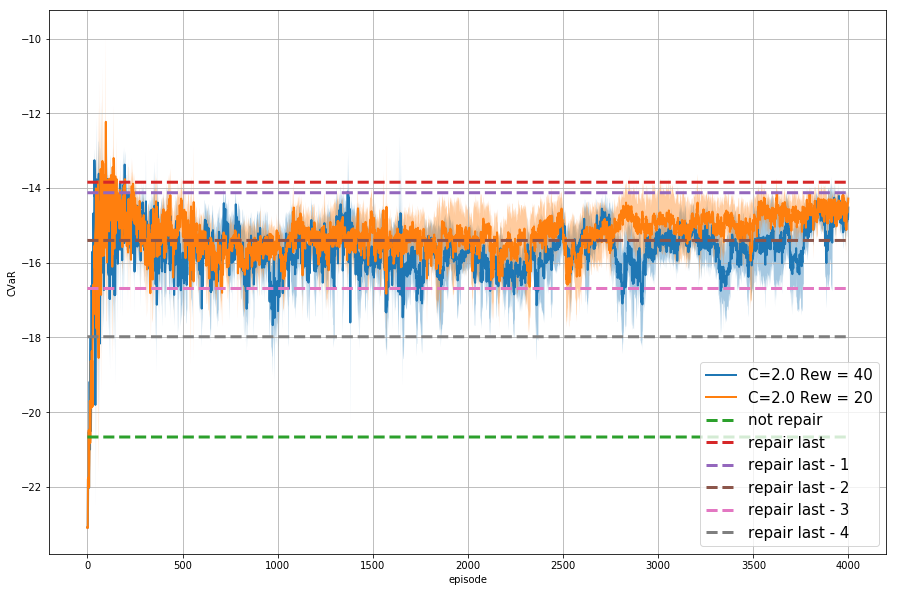

In [323]:
fig = plt.figure(figsize=(15, 10))
n = 1

#CVaRplot(fig, C2_Opt40_eval, label='C=2.0 Rew = 40', n=n)
CVaRplot(fig, C2_Opt40_online, label='C=2.0 Rew = 40', n=n)

#CVaRplot(fig, C2_Opt20_eval, label='C=2.0 Rew = 20 eval', n=n)
CVaRplot(fig, C2_Opt20_online, label='C=2.0 Rew = 20', n=n)

#CVaRplot(fig, C1_Opt40_eval, label='C=1.0 Rew = 40')
#CVaRplot(fig, C1_Opt40_online, label='C=1.0 Rew = 40', n=n)


#CVaRplot(fig, C1_Opt20_eval, label='C=1.0 Rew = 20', n=n)
#CVaRplot(fig, C1_Opt20_online, label='C=1.0 Rew = 20', n=n)

#CVaRplot(fig, C1_Opt10_eval, label='C=1.0 Rew = 10')
#CVaRplot(fig, C1_Opt10_online, label='C=1.0 Rew = 10', n=n)

#CVaRplot(fig, C1_Opt40_eval, label='C=10 Rew = 40')
#CVaRplot(fig, C1_Opt40_online, label='C=1.0 Rew = 40', n =n)

tot = 4000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -13.8470595927254, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)


plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

Text(0,0.5,'CVaR')

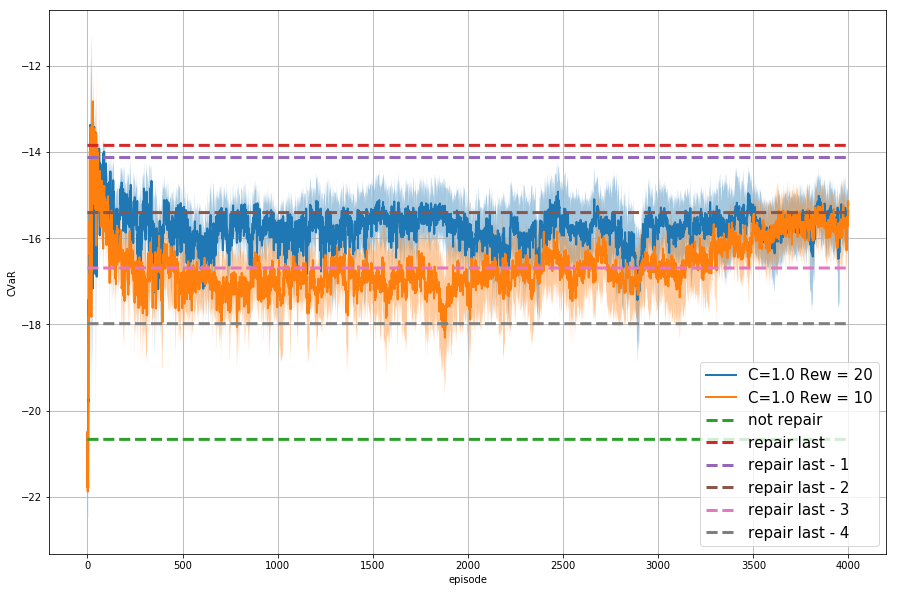

In [326]:
fig = plt.figure(figsize=(15, 10))
n = 1

#CVaRplot(fig, C1_Opt40_eval, label='C=1.0 Rew = 40')
#CVaRplot(fig, C1_Opt40_online, label='C=1.0 Rew = 40', n=n)


#CVaRplot(fig, C1_Opt20_eval, label='C=1.0 Rew = 20', n=n)
CVaRplot(fig, C1_Opt20_online, label='C=1.0 Rew = 20', n=n)

#CVaRplot(fig, C1_Opt10_eval, label='C=1.0 Rew = 10')
CVaRplot(fig, C1_Opt10_online, label='C=1.0 Rew = 10', n=n)

#CVaRplot(fig, C1_Opt40_eval, label='C=10 Rew = 40')
#CVaRplot(fig, C1_Opt40_online, label='C=1.0 Rew = 40', n =n)

tot = 4000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -13.8470595927254, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)


plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

Text(0,0.5,'CVaR')

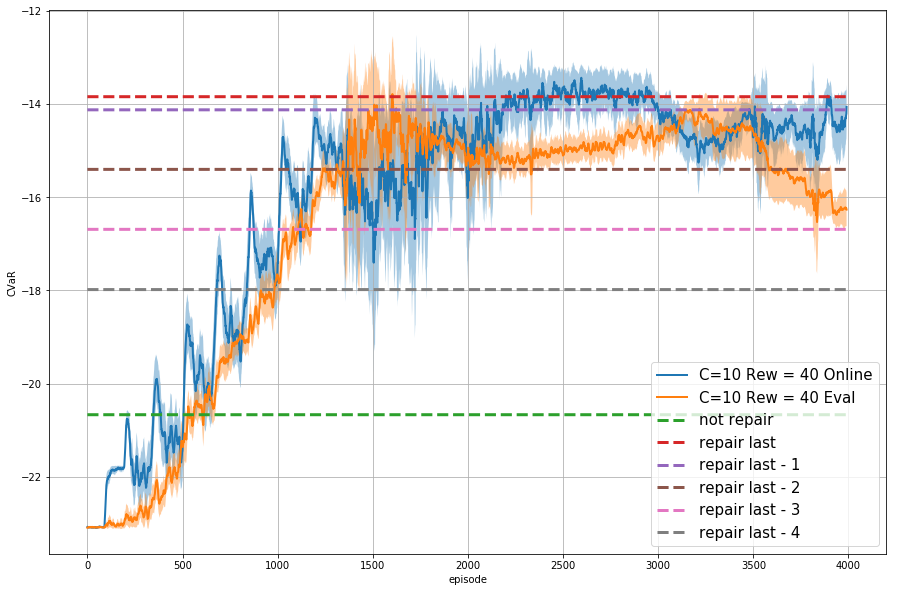

In [331]:
fig = plt.figure(figsize=(15, 10))
n = 1

#CVaRplot(fig, C1_Opt40_eval, label='C=1.0 Rew = 40')
#CVaRplot(fig, C1_Opt40_online, label='C=1.0 Rew = 40', n=n)


#CVaRplot(fig, C1_Opt20_eval, label='C=1.0 Rew = 20', n=n)
#CVaRplot(fig, C1_Opt20_online, label='C=1.0 Rew = 20', n=n)

#CVaRplot(fig, C1_Opt10_eval, label='C=1.0 Rew = 10')
#CVaRplot(fig, C1_Opt10_online, label='C=1.0 Rew = 10', n=n)

#CVaRplot(fig, C1_Opt40_eval, label='C=10 Rew = 40')
#CVaRplot(fig, C1_Opt40_online, label='C=1.0 Rew = 40', n =n)
CVaRplot(fig, C10_Opt40_online, label='C=10 Rew = 40 Online', n =10)
CVaRplot(fig, C10_Opt40_eval, label='C=10 Rew = 40 Eval', n =10)

tot = 4000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -13.8470595927254, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)


plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

In [346]:
C05_eval = read('results/cdf_new_05_cdf_eval_%d.npy', 2, alpha=0.25)
C05_online = read('results/cdf_new_05_cdf_online_%d.npy', 2, alpha=0.25)

Text(0,0.5,'CVaR')

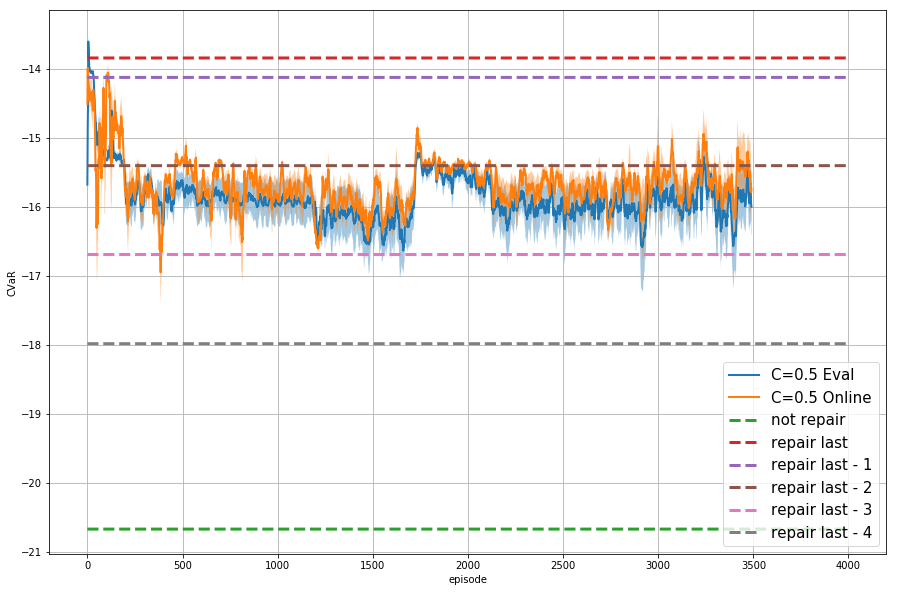

In [347]:
fig = plt.figure(figsize=(15, 10))
n = 1

CVaRplot(fig, C05_eval, label='C=0.5 Eval', n =10)
CVaRplot(fig, C05_online, label='C=0.5 Online', n =10)

tot = 4000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -13.8470595927254, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)


plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

In [2]:
C1_eval = read('results/cdf_new_1_cdf_eval_%d.npy', 3, alpha=0.25)
C1_online = read('results/cdf_new_1_cdf_online_%d.npy', 3, alpha=0.25)

Text(0,0.5,'CVaR')

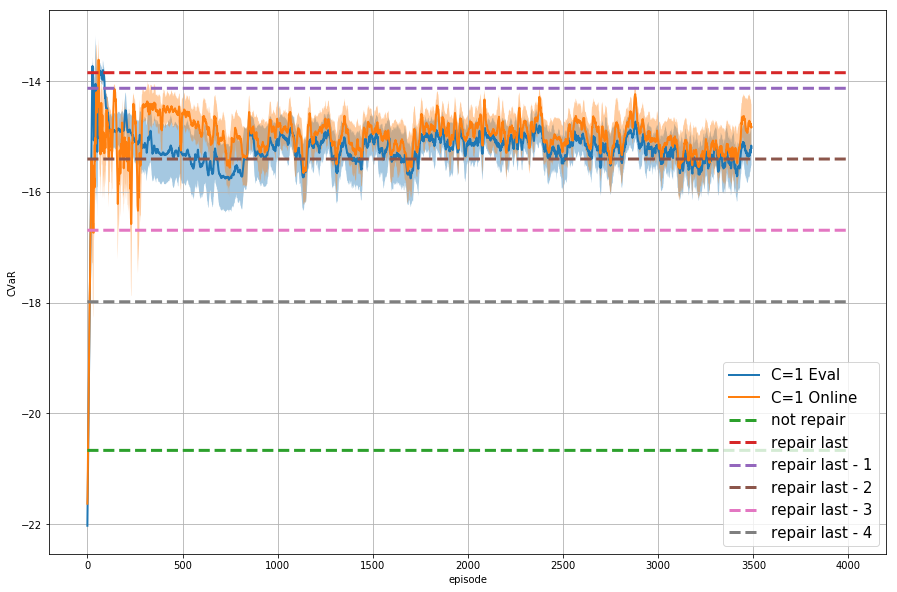

In [3]:
fig = plt.figure(figsize=(15, 10))
n = 1

CVaRplot(fig, C1_eval, label='C=1 Eval', n =10)
CVaRplot(fig, C1_online, label='C=1 Online', n =10)

tot = 4000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -13.8470595927254, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)


plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

In [4]:
C2_eval = read('results/cdf_new_2_cdf_eval_%d.npy', 3, alpha=0.25)
C2_online = read('results/cdf_new_2_cdf_online_%d.npy', 3, alpha=0.25)

Text(0,0.5,'CVaR')

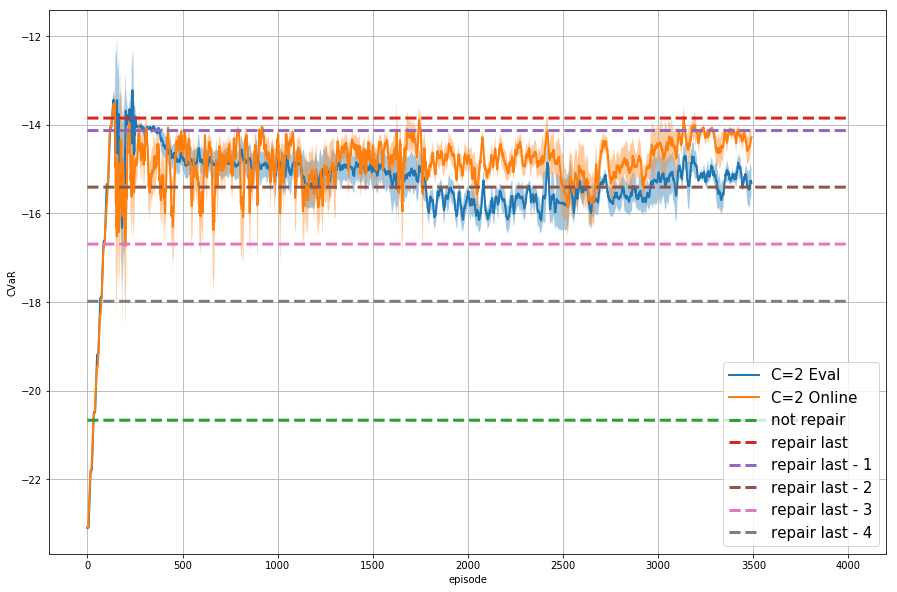

In [5]:
fig = plt.figure(figsize=(15, 10))
n = 1

CVaRplot(fig, C2_eval, label='C=2 Eval', n =10)
CVaRplot(fig, C2_online, label='C=2 Online', n =10)

tot = 4000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -13.8470595927254, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)


plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

Text(0,0.5,'CVaR')

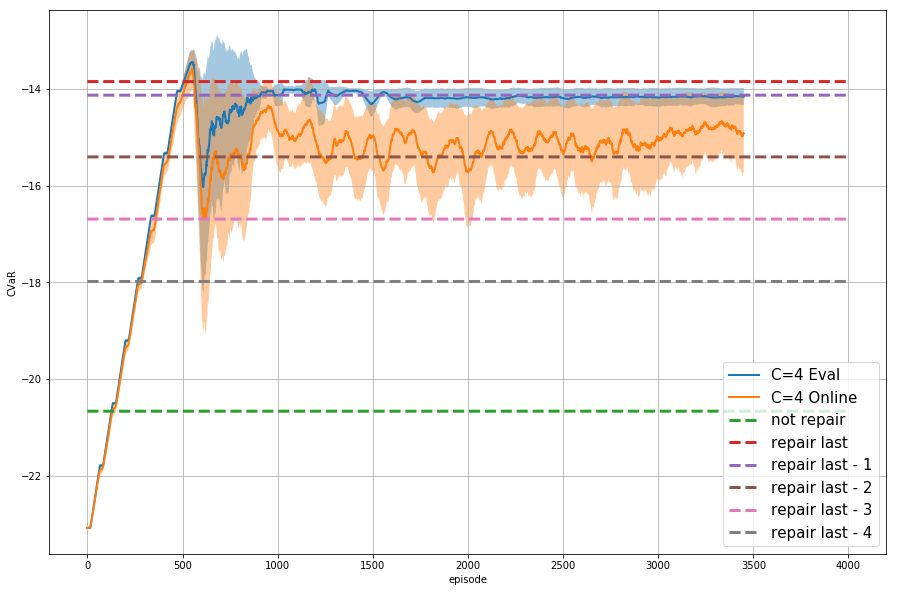

In [13]:
C4_eval = read('results/cdf_new_4_cdf_eval_%d.npy', 9, alpha=0.25)
C4_online = read('results/cdf_new_4_cdf_online_%d.npy', 9, alpha=0.25)

fig = plt.figure(figsize=(15, 10))
n = 50

CVaRplot(fig, C4_eval, label='C=4 Eval', n =50)
CVaRplot(fig, C4_online, label='C=4 Online', n =50)

tot = 4000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -13.8470595927254, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)


plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

Text(0,0.5,'CVaR')

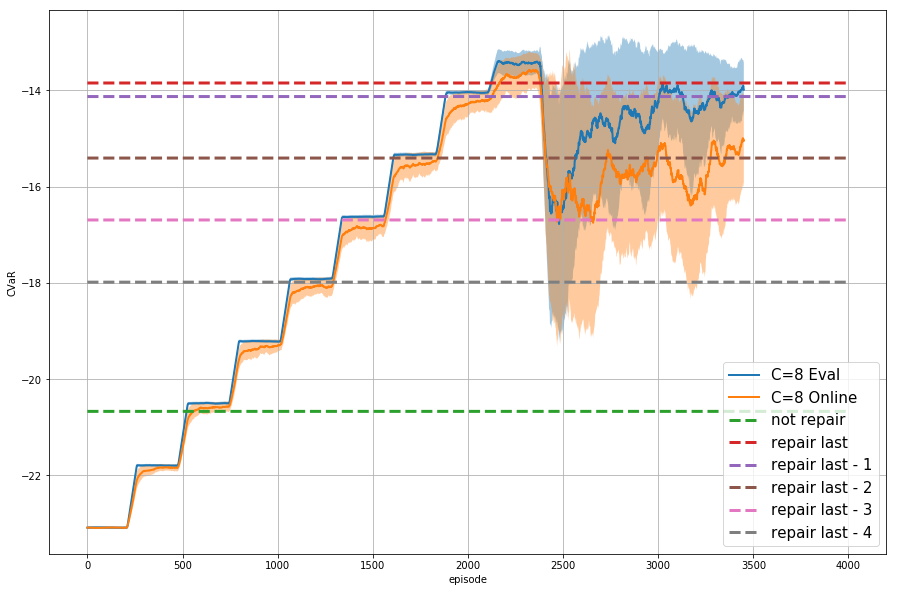

In [30]:
C8_eval = read('results/cdf_new_8_cdf_eval_%d.npy', 9, alpha=0.25)
C8_online = read('results/cdf_new_8_cdf_online_%d.npy', 9, alpha=0.25)

fig = plt.figure(figsize=(15, 10))
n = 50

CVaRplot(fig, C8_eval, label='C=8 Eval', n =50)
CVaRplot(fig, C8_online, label='C=8 Online', n =50)

tot = 4000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -13.8470595927254, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)


plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

Text(0,0.5,'CVaR')

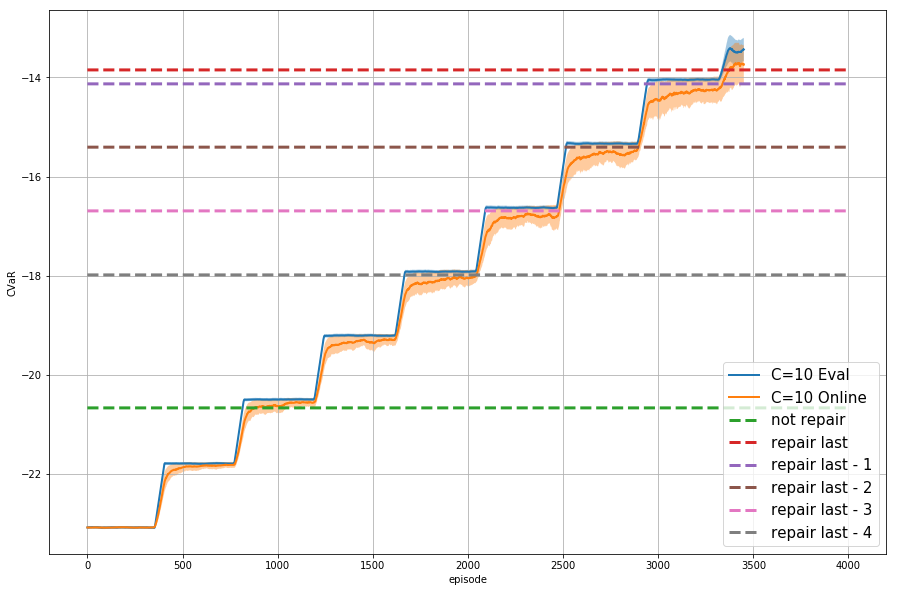

In [31]:
C10_eval = read('results/cdf_new_10_cdf_eval_%d.npy', 9, alpha=0.25)
C10_online = read('results/cdf_new_10_cdf_online_%d.npy', 9, alpha=0.25)

fig = plt.figure(figsize=(15, 10))
n = 50

CVaRplot(fig, C10_eval, label='C=10 Eval', n =50)
CVaRplot(fig, C10_online, label='C=10 Online', n =50)

tot = 4000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -13.8470595927254, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)


plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

Text(0,0.5,'CVaR')

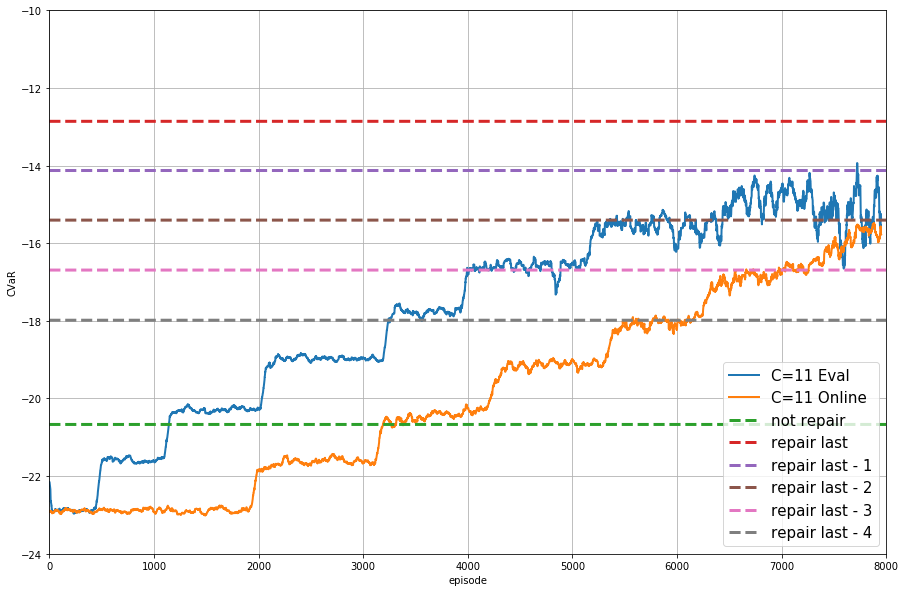

In [234]:
C8_eval = read('results/cdf_long_16__cdf_eval_%d.npy', 1, alpha=0.25)
C8_online = read('results/cdf_long_16__cdf_online_%d.npy', 1, alpha=0.25)

fig = plt.figure(figsize=(15, 10))
n = 50

CVaRplot(fig, C8_eval, label='C=11 Eval', n =50)
CVaRplot(fig, C8_online, label='C=11 Online', n =50)

tot = 8000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -12.861797450359479, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)

plt.xlim([0, 8000])
plt.ylim([-24, -10])
plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

Text(0,0.5,'CVaR')

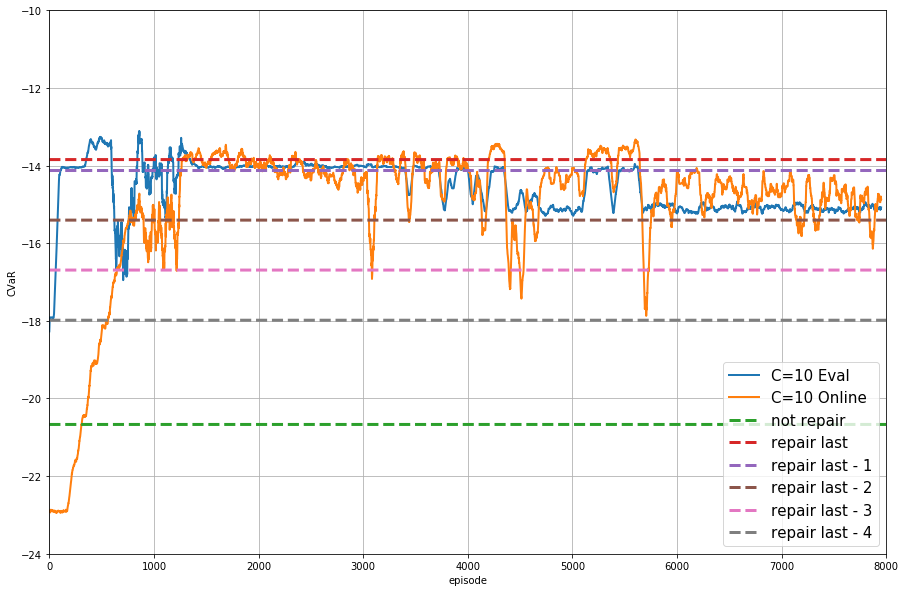

In [237]:
C8_eval = read('check_cdf_eval_%d.npy', 0, alpha=0.25)
C8_online = read('check_cdf_online_%d.npy', 0, alpha=0.25)

fig = plt.figure(figsize=(15, 10))
n = 50

CVaRplot(fig, C8_eval, label='C=10 Eval', n =50)
CVaRplot(fig, C8_online, label='C=10 Online', n =50)

tot = 8000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -13.8470595927254, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)

plt.xlim([0, 8000])
plt.ylim([-24, -10])
plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

Text(0,0.5,'CVaR')

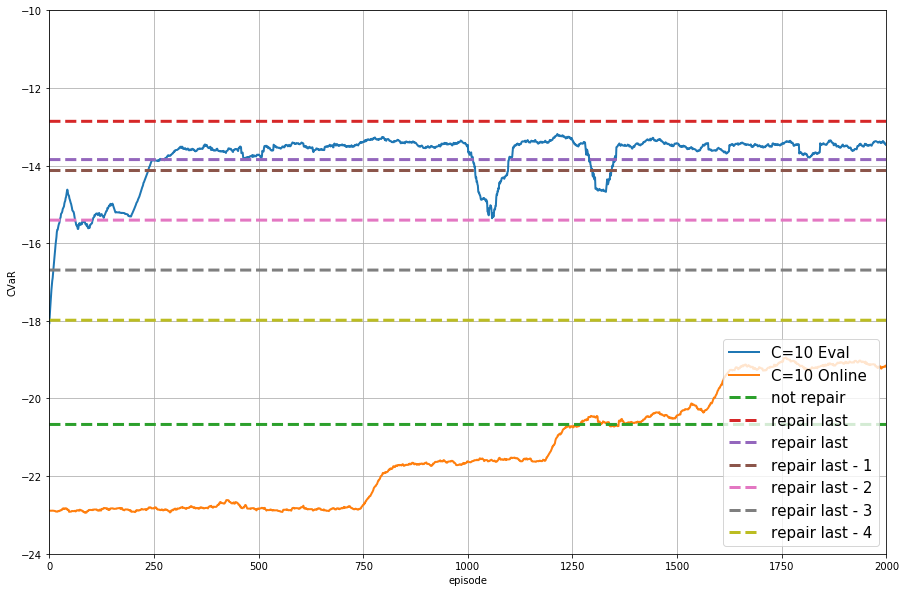

In [221]:
C8_eval = read('check_20_cdf_eval_%d.npy', 0, alpha=0.25)
C8_online = read('check_20_cdf_online_%d.npy', 0, alpha=0.25)

fig = plt.figure(figsize=(15, 10))
n = 50

CVaRplot(fig, C8_eval, label='C=10 Eval', n =50)
CVaRplot(fig, C8_online, label='C=10 Online', n =50)

tot = 6000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', label = 'not repair', linewidth=3)

plt.plot(np.arange(tot), np.ones(tot) * -12.861797450359479, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -13.8470595927254, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)

plt.xlim([0, 2000])
plt.ylim([-24, -10])
plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

Text(0,0.5,'CVaR')

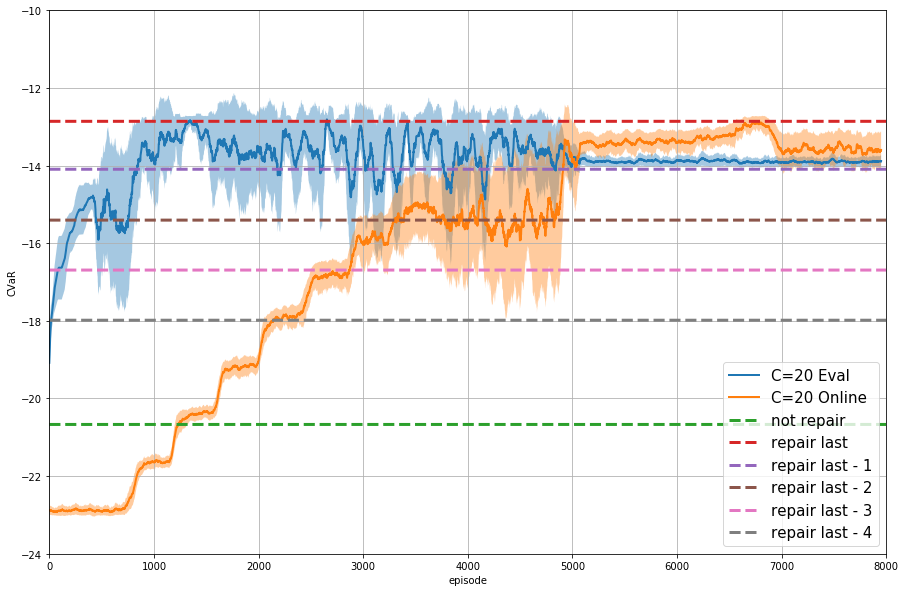

In [263]:
C8_eval = read('results/cdf_chris_long_20__cdf_eval_%d.npy', 5, alpha=0.25)
C8_online = read('results/cdf_chris_long_20__cdf_online_%d.npy', 5, alpha=0.25)

fig = plt.figure(figsize=(15, 10))
n = 50

CVaRplot(fig, C8_eval, label='C=20 Eval', n =50)
CVaRplot(fig, C8_online, label='C=20 Online', n =50)

tot = 8000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -12.861797450359479, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.09613165102302, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)

plt.xlim([0, 8000])
plt.ylim([-24, -10])
plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

Text(0,0.5,'CVaR')

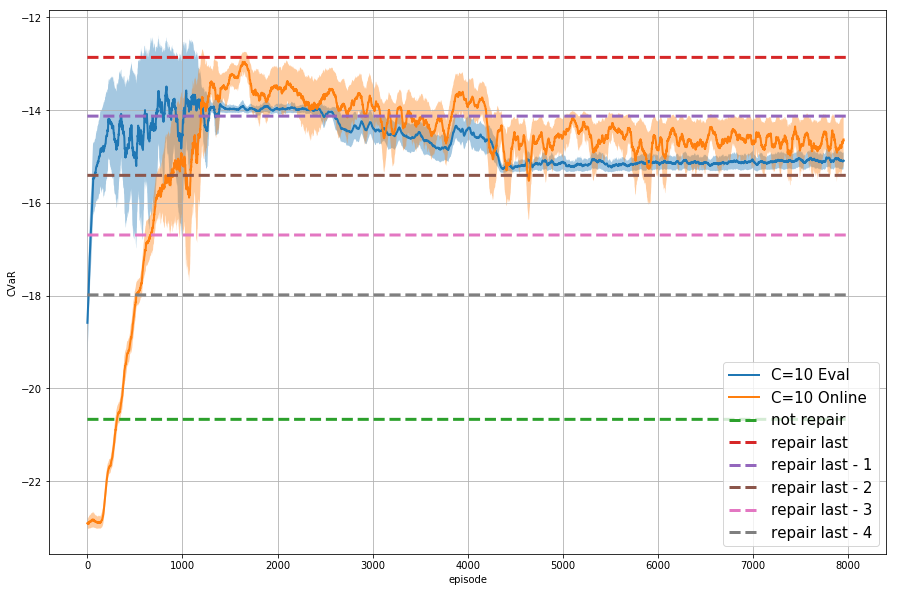

In [262]:
C8_eval = read('results/cdf_chris_long_10__cdf_eval_%d.npy', 5, alpha=0.25)
C8_online = read('results/cdf_chris_long_10__cdf_online_%d.npy', 5, alpha=0.25)

fig = plt.figure(figsize=(15, 10))
n = 50

CVaRplot(fig, C8_eval, label='C=10 Eval', n =50)
CVaRplot(fig, C8_online, label='C=10 Online', n =50)

tot = 8000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -12.861797450359479, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)


plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

Text(0,0.5,'CVaR')

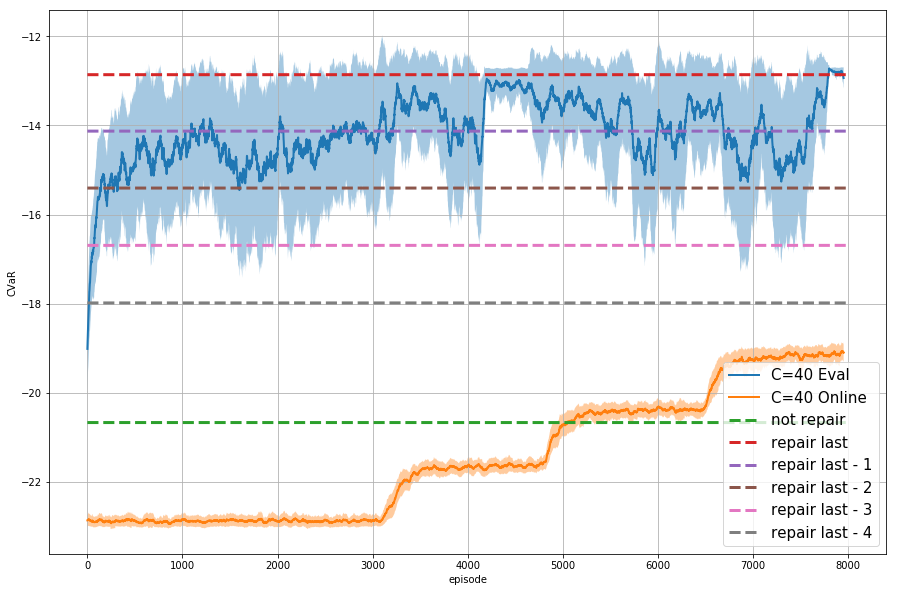

In [261]:
C8_eval = read('results/cdf_chris_long_40__cdf_eval_%d.npy', 5, alpha=0.25)
C8_online = read('results/cdf_chris_long_40__cdf_online_%d.npy', 5, alpha=0.25)

fig = plt.figure(figsize=(15, 10))
n = 50

CVaRplot(fig, C8_eval, label='C=40 Eval', n =50)
CVaRplot(fig, C8_online, label='C=40 Online', n =50)

tot = 8000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -12.861797450359479, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)

plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

Text(0,0.5,'CVaR')

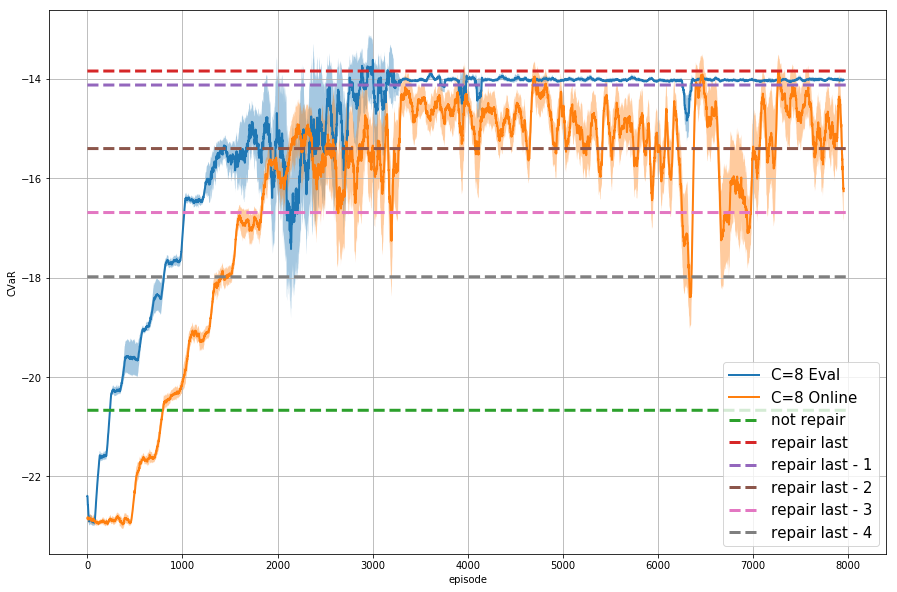

In [107]:
C8_eval1 = read('results/cdf_long_8_first__cdf_eval_%d.npy', 1, alpha=0.25)
C8_online1 = read('results/cdf_long_8_first__cdf_online_%d.npy', 1, alpha=0.25)

C8_eval2 = read('results/cdf_long_8_second__cdf_eval_%d.npy', 1, alpha=0.25)
C8_online2 = read('results/cdf_long_8_second__cdf_online_%d.npy', 1, alpha=0.25)

C8_eval = np.concatenate([C8_eval1, C8_eval2])
C8_online = np.concatenate([C8_online1, C8_online2])

fig = plt.figure(figsize=(15, 10))
n = 50

CVaRplot(fig, C8_eval, label='C=8 Eval', n =50)
CVaRplot(fig, C8_online, label='C=8 Online', n =50)

tot = 8000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -13.8470595927254, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)


plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

In [192]:
file = np.load('results/cdf_chris_long_40__cdf_eval_%d.npy'%(0))
tot = np.zeros((2000, 20))
for i in range(2000):
    tot[i, :] = file[i*4:(i+1)*4, :].flatten()

Text(0,0.5,'CVaR')

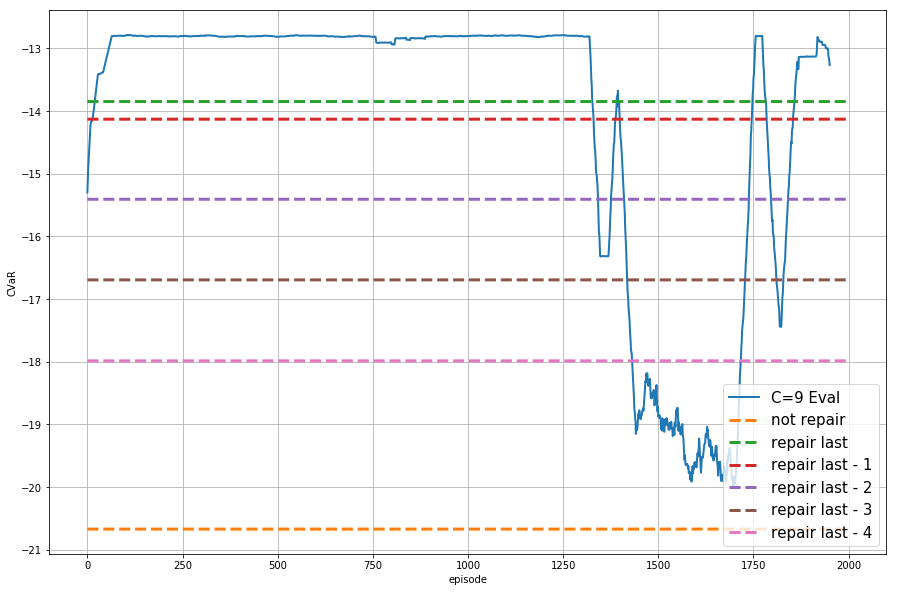

In [193]:
file = tot
alpha = 0.25
cvar = np.zeros(file.shape[0])
for i in range(file.shape[0]):
    var = np.sort(file[i, :])[int(len(file[i, :]) * alpha)]
    idx = np.where(file[i, :] <= var)
    cvar[i] = np.mean(file[i, idx])
cvar = np.expand_dims(cvar, axis = 0)

fig = plt.figure(figsize=(15, 10))
n = 1
CVaRplot(fig, cvar, label='C=9 Eval', n =50)
tot = 2000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -13.8470595927254, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)


plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

Text(0,0.5,'CVaR')

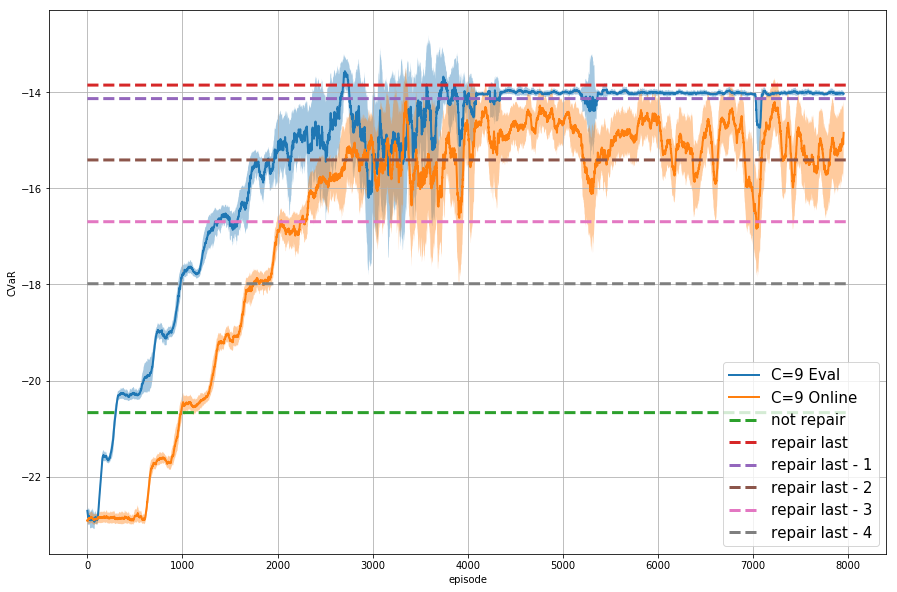

In [104]:
C9_eval1 = read('results/cdf_long_9_first__cdf_eval_%d.npy', 2, alpha=0.25)
C9_online1 = read('results/cdf_long_9_first__cdf_online_%d.npy', 2, alpha=0.25)

C9_eval2 = read('results/cdf_long_9_second__cdf_eval_%d.npy', 1, alpha=0.25)
C9_online2 = read('results/cdf_long_9_second__cdf_online_%d.npy', 1, alpha=0.25)

C9_eval = np.concatenate([C9_eval1, C9_eval2])
C9_online = np.concatenate([C9_online1, C9_online2])

fig = plt.figure(figsize=(15, 10))
n = 50

CVaRplot(fig, C9_eval, label='C=9 Eval', n =50)
CVaRplot(fig, C9_online, label='C=9 Online', n =50)

tot = 8000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -13.8470595927254, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)


plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

Text(0,0.5,'CVaR')

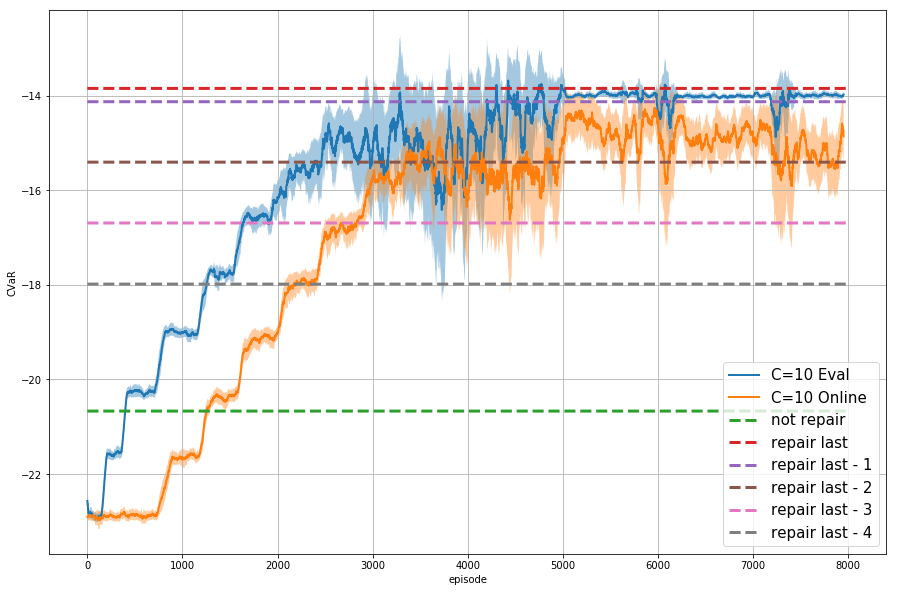

In [90]:
C10_eval1 = read('results/cdf_long_10_first__cdf_eval_%d.npy', 1, alpha=0.25)
C10_online1 = read('results/cdf_long_10_first__cdf_online_%d.npy', 1, alpha=0.25)

C10_eval2 = read('results/cdf_long_10_second__cdf_eval_%d.npy', 2, alpha=0.25)
C10_online2 = read('results/cdf_long_10_second__cdf_online_%d.npy', 2, alpha=0.25)

C10_eval = np.concatenate([C10_eval1, C10_eval2])
C10_online = np.concatenate([C10_online1, C10_online2])

fig = plt.figure(figsize=(15, 10))
n = 50

CVaRplot(fig, C10_eval, label='C=10 Eval', n =50)
CVaRplot(fig, C10_online, label='C=10 Online', n =50)

tot = 8000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -13.8470595927254, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)


plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

Text(0,0.5,'CVaR')

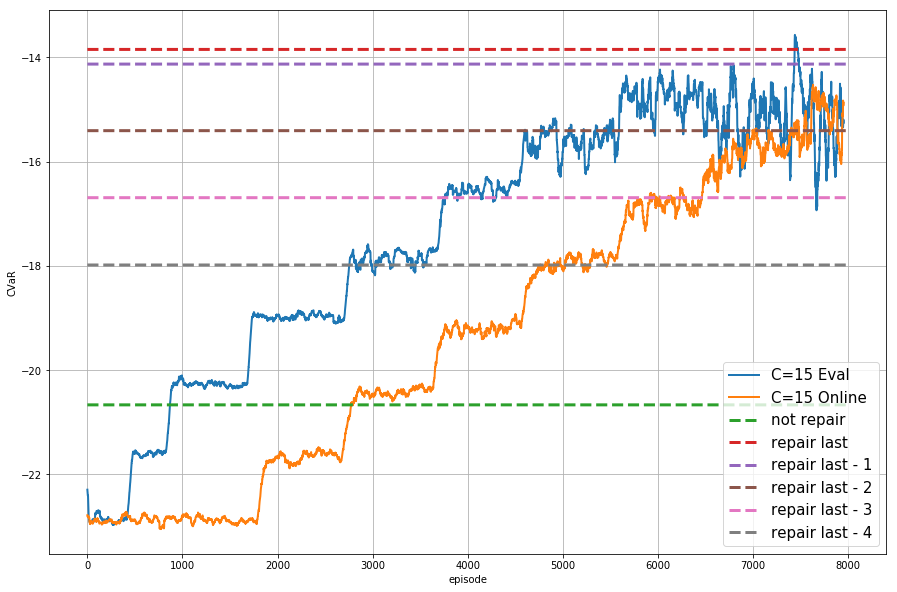

In [81]:
C15_eval = read('results/cdf_long_15_first__cdf_eval_%d.npy', 1, alpha=0.25)
C15_online = read('results/cdf_long_15_first__cdf_online_%d.npy', 1, alpha=0.25)

fig = plt.figure(figsize=(15, 10))
n = 50

CVaRplot(fig, C15_eval, label='C=15 Eval', n =50)
CVaRplot(fig, C15_online, label='C=15 Online', n =50)

tot = 8000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -13.8470595927254, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)


plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

Text(0,0.5,'CVaR')

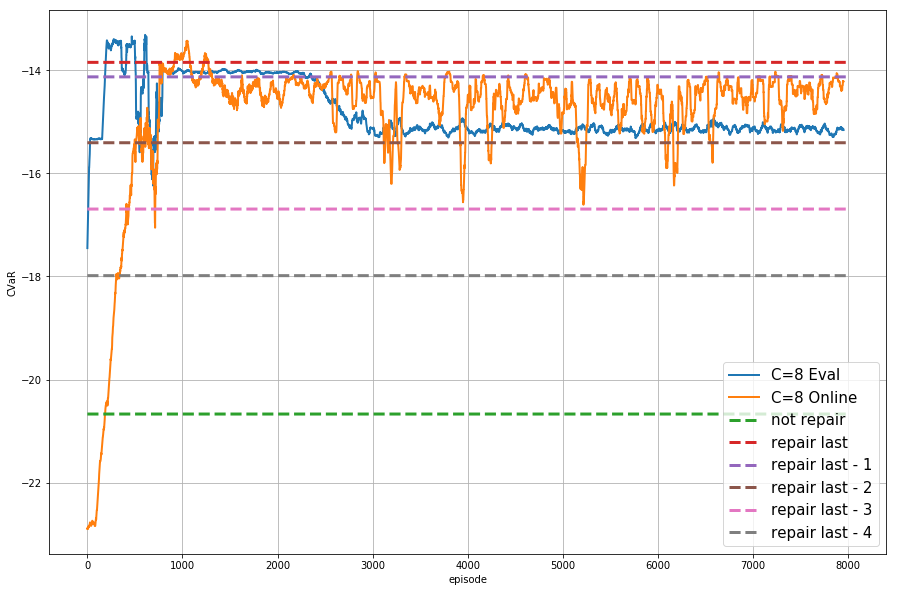

In [108]:
C9_eval = read('results/cdf_chris_long_8__cdf_eval_%d.npy', 1, alpha=0.25)
C9_online = read('results/cdf_chris_long_8__cdf_online_%d.npy', 1, alpha=0.25)

fig = plt.figure(figsize=(15, 10))
n = 50

CVaRplot(fig, C9_eval, label='C=8 Eval', n =50)
CVaRplot(fig, C9_online, label='C=8 Online', n =50)

tot = 8000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -13.8470595927254, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)


plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

In [ ]:
C10_eval1 = read('results/cdfc51_10_2_cdf_eval_%d.npy', 4, alpha=0.25)
C10_online1 = read('results/cdfc51_10_2_cdf_online_%d.npy', 4, alpha=0.25)

C10_eval3 = read('results/cdfc51_10_3_cdf_eval_%d.npy', 1, alpha=0.25)
C10_online3 = read('results/cdfc51_10_3_cdf_online_%d.npy', 1, alpha=0.25)

C10_eval2 = read('results/cdfc51_10_cdf_eval_%d.npy', 1, alpha=0.25)
C10_online2 = read('results/cdfc51_10_cdf_online_%d.npy', 1, alpha=0.25)

C10_eval = np.concatenate([C10_eval1, C10_eval2, C10_eval3])
C10_online = np.concatenate([C10_online1, C10_online2, C10_online3])

In [108]:
e_eval1 = read('results/egreedy_2_e_greedy_eval_%d.npy', 1, alpha=0.25)
e_online1 = read('results/egreedy_2_e_greedy_online_%d.npy', 1, alpha=0.25)

e_eval2 = read('results/egreedy_3_e_greedy_eval_%d.npy', 1, alpha=0.25)
e_online2 = read('results/egreedy_3_e_greedy_online_%d.npy', 1, alpha=0.25)

e_eval3 = read('results/egreedy_e_greedy_eval_%d.npy', 1, alpha=0.25)
e_online3 = read('results/egreedy_e_greedy_online_%d.npy', 1, alpha=0.25)

e_eval = np.concatenate([e_eval1, e_eval2, e_eval3])
e_online = np.concatenate([e_online1, e_online2, e_online3])

Text(0,0.5,'CVaR')

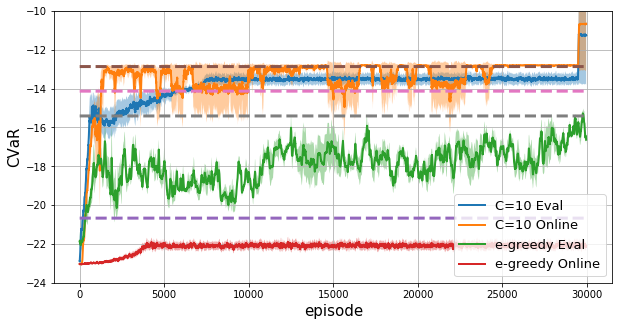

In [118]:
fig = plt.figure(figsize=(10, 5))
n = 50

CVaRplot(fig, C10_eval, label='C=10 Eval', n =50)
CVaRplot(fig, C10_online, label='C=10 Online', n =50)

CVaRplot(fig, e_eval, label='e-greedy Eval', n =50)
CVaRplot(fig, e_online, label='e-greedy Online', n =50)

tot = 30000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -12.861797450359479, '--', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--', linewidth=3)


plt.legend(loc=4, fontsize= 13)
plt.grid()
#plt.xlim([0, 25000])
plt.ylim([-24, -10])
plt.xlabel('episode', fontsize=15)
plt.ylabel('CVaR', fontsize=15)

In [90]:
C9_eval1 = read('results/cdfc51_9_2_cdf_eval_%d.npy', 1, alpha=0.25)
C9_online1 = read('results/cdfc51_9_2_cdf_online_%d.npy', 1, alpha=0.25)

C9_eval2 = read('results/cdfc51_9_1_cdf_eval_%d.npy', 1, alpha=0.25)
C9_online2 = read('results/cdfc51_9_1_cdf_online_%d.npy', 1, alpha=0.25)

C9_eval = np.concatenate([C9_eval1, C9_eval2])
C9_online = np.concatenate([C9_online1, C9_online2])

Text(0,0.5,'CVaR')

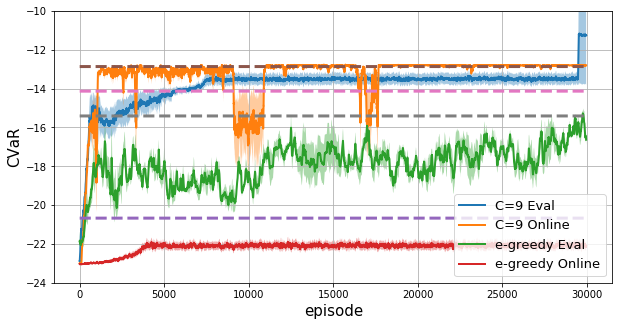

In [119]:
fig = plt.figure(figsize=(10, 5))
n = 50

CVaRplot(fig, C10_eval, label='C=9 Eval', n =50)
CVaRplot(fig, C9_online, label='C=9 Online', n =50)

CVaRplot(fig, e_eval, label='e-greedy Eval', n =50)
CVaRplot(fig, e_online, label='e-greedy Online', n =50)

tot = 30000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -12.861797450359479, '--', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--', linewidth=3)


plt.legend(loc=4, fontsize= 13)
plt.grid()
#plt.xlim([0, 25000])
plt.ylim([-24, -10])
plt.xlabel('episode', fontsize=15)
plt.ylabel('CVaR', fontsize=15)

In [116]:
C13_eval1 = read('results/cdfc51_13_2_cdf_eval_%d.npy', 1, alpha=0.25)
C13_online1 = read('results/cdfc51_13_2_cdf_online_%d.npy', 1, alpha=0.25)

C13_eval2 = read('results/cdfc51_13_cdf_eval_%d.npy', 1, alpha=0.25)
C13_online2 = read('results/cdfc51_13_cdf_online_%d.npy', 1, alpha=0.25)

C13_eval3 = read('results/cdfc51_13_3_cdf_eval_%d.npy', 1, alpha=0.25)
C13_online3 = read('results/cdfc51_13_3_cdf_online_%d.npy', 1, alpha=0.25)

C13_eval = np.concatenate([C13_eval1, C13_eval2, C13_eval3])
C13_online = np.concatenate([C13_online1, C13_online2, C13_online3])

Text(0,0.5,'CVaR')

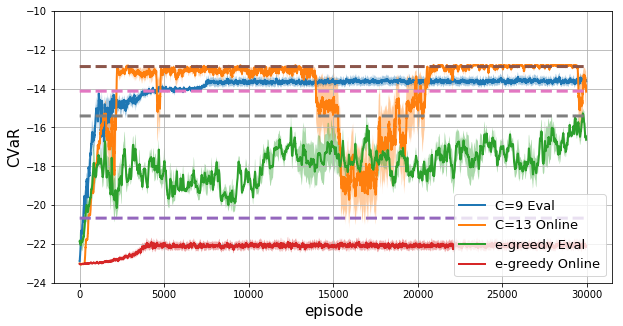

In [120]:
fig = plt.figure(figsize=(10, 5))
n = 50

CVaRplot(fig, C13_eval, label='C=9 Eval', n =50)
CVaRplot(fig, C13_online, label='C=13 Online', n =50)

CVaRplot(fig, e_eval, label='e-greedy Eval', n =50)
CVaRplot(fig, e_online, label='e-greedy Online', n =50)

tot = 30000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -12.861797450359479, '--', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--', linewidth=3)


plt.legend(loc=4, fontsize= 13)
plt.grid()
#plt.xlim([0, 25000])
plt.ylim([-24, -10])
plt.xlabel('episode', fontsize=15)
plt.ylabel('CVaR', fontsize=15)

In [103]:
C15_eval1 = read('results/cdfc51_15_2_cdf_eval_%d.npy', 1, alpha=0.25)
C15_online1 = read('results/cdfc51_15_2_cdf_online_%d.npy', 1, alpha=0.25)

C15_eval2 = read('results/cdfc51_15_cdf_eval_%d.npy', 1, alpha=0.25)
C15_online2 = read('results/cdfc51_15_cdf_online_%d.npy', 1, alpha=0.25)

C15_eval3 = read('results/cdfc51_15_3_cdf_eval_%d.npy', 1, alpha=0.25)
C15_online3 = read('results/cdfc51_15_3_cdf_online_%d.npy', 1, alpha=0.25)

C15_eval = np.concatenate([C15_eval1, C15_eval2, C15_eval3])
C15_online = np.concatenate([C15_online1, C15_online2, C15_online3])

Text(0,0.5,'CVaR')

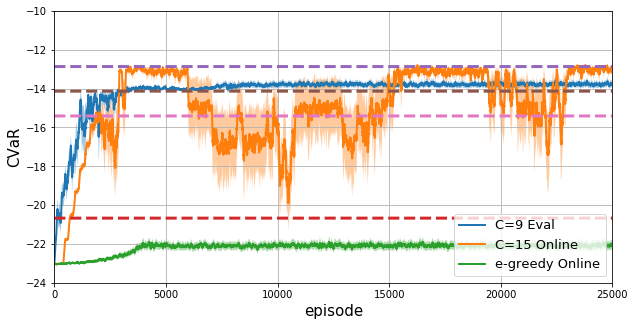

In [121]:
fig = plt.figure(figsize=(10, 5))
n = 50

CVaRplot(fig, C15_eval, label='C=9 Eval', n =50)
CVaRplot(fig, C15_online, label='C=15 Online', n =50)

#CVaRplot(fig, e_eval, label='e-greedy Eval', n =50)
CVaRplot(fig, e_online, label='e-greedy Online', n =50)

tot = 30000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -12.861797450359479, '--', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--', linewidth=3)


plt.legend(loc=4, fontsize= 13)
plt.grid()
plt.xlim([0, 25000])
plt.ylim([-24, -10])
plt.xlabel('episode', fontsize=15)
plt.ylabel('CVaR', fontsize=15)

In [250]:
C9_eval = read('results/cdf_chris_long_9__cdf_eval_%d.npy', 1, alpha=0.25)
C9_online = read('results/cdf_chris_long_9__cdf_online_%d.npy', 1, alpha=0.25)

fig = plt.figure(figsize=(15, 10))
n = 50

CVaRplot(fig, C9_eval, label='C=9 Eval', n =50)
CVaRplot(fig, C9_online, label='C=9 Online', n =50)

tot = 8000
plt.plot(np.arange(tot), np.ones(tot) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -13.8470595927254, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(tot), np.ones(tot) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)


plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

TypeError: not all arguments converted during string formatting

Text(0,0.5,'CVaR')

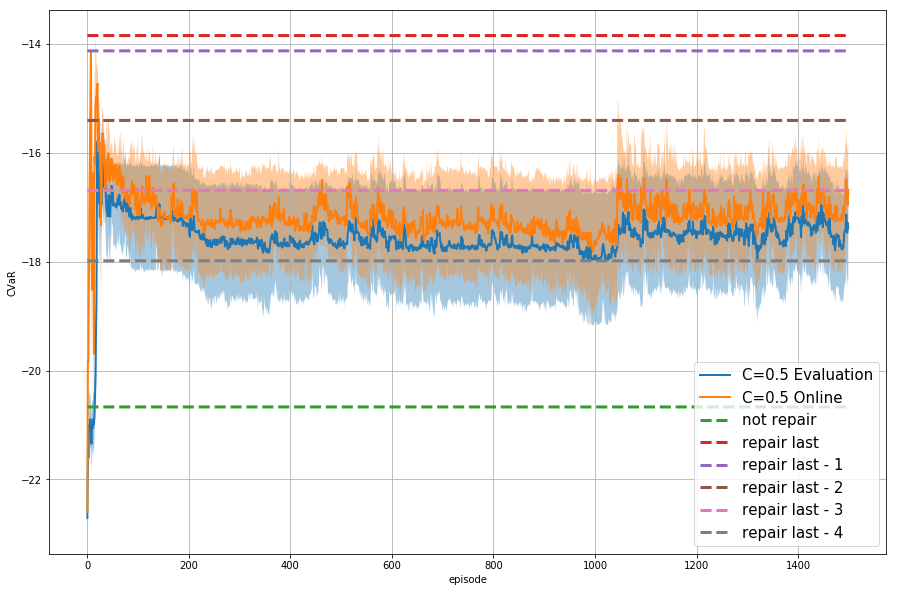

In [124]:
fig = plt.figure(figsize=(15, 10))
CVaRplot(fig, C05_eval, label='C=0.5 Evaluation')
CVaRplot(fig, C05_online, label='C=0.5 Online')

plt.plot(np.arange(1500), np.ones(1500) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -13.8470595927254, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)

plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

Text(0,0.5,'CVaR')

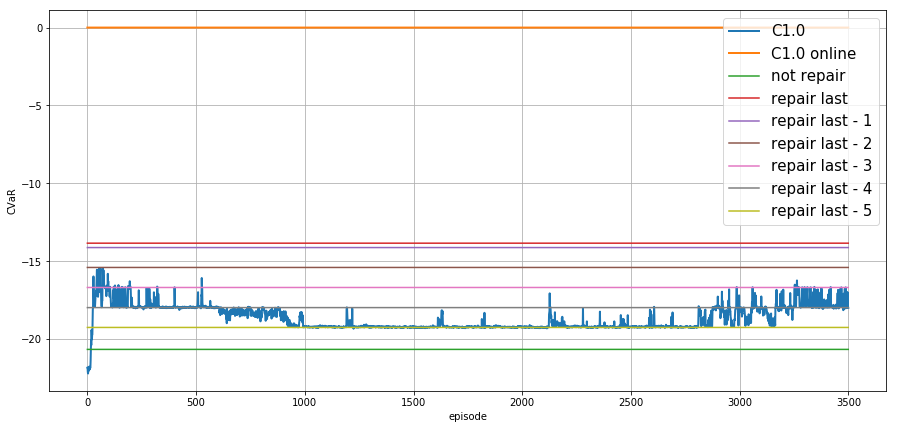

In [132]:
fig = plt.figure(figsize=(15, 7))
CVaRplot(fig, C1_eval_3000, label='C1.0')
CVaRplot(fig, C1_online_3000, label='C1.0 online')

plt.plot(np.arange(3500), np.ones(3500) * -20.66888775365751, label = 'not repair')
plt.plot(np.arange(3500), np.ones(3500) * -13.8470595927254, label = 'repair last')
plt.plot(np.arange(3500), np.ones(3500) * -14.128583926728682, label = 'repair last - 1')
plt.plot(np.arange(3500), np.ones(3500) * -15.406251169207456, label = 'repair last - 2')
plt.plot(np.arange(3500), np.ones(3500) * -16.69258923741405, label = 'repair last - 3')
plt.plot(np.arange(3500), np.ones(3500) * -17.98446898597323, label = 'repair last - 4')
plt.plot(np.arange(3500), np.ones(3500) *  -19.259120801524134, label = 'repair last - 5')

plt.legend(fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

In [65]:
file = np.load('cliff_cdf_eval_0.npy')
alpha= 0.1
cvar = np.zeros(file.shape[0])
for i in range(file.shape[0]):
    var = np.sort(file[i, :])[int(len(file[i, :]) * alpha)]
    idx = np.where(file[i, :] <= var)
    cvar[i] = np.mean(file[i, idx])
cvar = np.expand_dims(cvar, axis = 0)

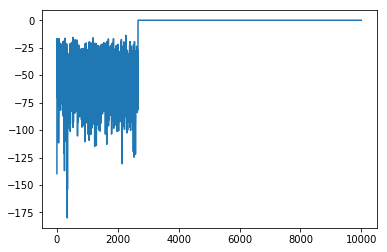

In [66]:
plt.plot(np.mean(cvar, axis=0))